In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# ─── Configuration ───────────────────────────────────────────────────────
CSV_PATH   = "/home/nckh2/qa/ultimate_crypto.csv"
OUTPUT_DIR = "/home/nckh2/qa/ChanFormer/graph"
os.makedirs(OUTPUT_DIR, exist_ok=True)

SAVE_PATH = os.path.join(OUTPUT_DIR, "barplot_mae_rmse_per_model.png")

MAIN_MODEL = "OmniFormer"

# ─── Global Plot Settings (same as your second script) ───────────────────
mpl.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['DejaVu Sans', 'Arial', 'Helvetica'],
    'font.size': 15,
    'axes.titlesize': 19,
    'axes.labelsize': 17,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 15,
    'figure.dpi': 100,
    'savefig.dpi': 600,
})

FIGSIZE = (10, 6)

# ─── Same MODEL_COLORS dictionary from your code ─────────────────────────
MODEL_COLORS = {
    'OmniFormer': '#D81E5B',
    'EnFormer': '#FF6B6B',
    'iTransformer': '#1E90FF',
    'PatchTST': '#32CD32',
    'Autoformer': '#FFECB3',
    'FEDformer': '#C4F4E3',
    'Informer': '#FFD166',
    'MoLE': '#F4A261',
    'Linear': '#A3BFFA',
    'DLinear': '#B3E5FC',
    'NLinear': '#81D4FA',
    'RLinear': '#4FC3F7',
    'RNN': '#999999',
    'LSTM': '#777777',
    'GRU': '#555555',
    'CLAM': '#333333',
    'Default': '#A9A9A9'
}

# ─── Choose 2 colors from your palette ───────────────────────────────────
COLOR_MAE  = MODEL_COLORS['EnFormer']
COLOR_RMSE = MODEL_COLORS['iTransformer']

# ─── Load & Aggregate ─────────────────────────────────────────────────────
df = pd.read_csv(CSV_PATH)

agg = df.groupby('model')[['mae_scaled', 'rmse_scaled']].mean().reset_index()

others = agg[agg['model'] != MAIN_MODEL].sort_values('mae_scaled')

if MAIN_MODEL in agg['model'].values:
    main_row = agg[agg['model'] == MAIN_MODEL]
    agg_sorted = pd.concat([main_row, others], ignore_index=True)
else:
    agg_sorted = agg.sort_values('mae_scaled').reset_index(drop=True)
    MAIN_MODEL = agg_sorted['model'].iloc[0]

# ─── Plot ─────────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=FIGSIZE)

models = agg_sorted['model']
x = np.arange(len(models))
width = 0.35

rects1 = ax.bar(
    x - width/2,
    agg_sorted['mae_scaled'],
    width,
    label='MAE',
    color=COLOR_MAE,
    edgecolor='black',
    linewidth=0.8
)

rects2 = ax.bar(
    x + width/2,
    agg_sorted['rmse_scaled'],
    width,
    label='RMSE',
    color=COLOR_RMSE,
    edgecolor='black',
    linewidth=0.8
)

# ─── Styling ──────────────────────────────────────────────────────────────
ax.set_xlabel('Model')
ax.set_ylabel('Error')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

ax.legend(frameon=True, edgecolor='gray')
ax.grid(axis='y', linestyle='--', alpha=0.35)
ax.set_axisbelow(True)

# Value labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 4),
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=10)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.savefig(SAVE_PATH, bbox_inches='tight')
plt.close()

print(f"Bar plot saved to: {SAVE_PATH}")

Bar plot saved to: /home/nckh2/qa/ChanFormer/graph/barplot_mae_rmse_per_model.png


In [ ]:
import os
import pandas as pd
import yfinance as yf

stocks = [
    'NVDA', 'AAPL', 'GOOGL', 'MSFT', 'AMZN',
    'META', 'TSLA', 'AVGO', 'TSM', 'BRK-B'
]

start_date = "2010-01-01"
end_date   = None

output_dir = "/home/nckh2/qa/ChanFormer/dataset/stock"
os.makedirs(output_dir, exist_ok=True)

for symbol in stocks:
    print(f"\nFetching {symbol}...")
    
    df = yf.download(
        symbol,
        start=start_date,
        end=end_date,
        interval="1d",
        auto_adjust=True,
        progress=False
    )
    
    if df.empty:
        print(f"  No data for {symbol}")
        continue
    
    df = df[['Open','High','Low','Close','Volume']]
    df.columns = ['open','high','low','close','volume']
    
    file_path = os.path.join(output_dir, f"{symbol}_1d_full.csv")
    df.to_csv(file_path)
    
    print(f"  Saved {len(df):,} rows")
    print(f"  Range: {df.index.min().date()} → {df.index.max().date()}")
    print(f"  Latest close: {df['close'].iloc[-1]:,.2f} USD")

print("\nDone.")


Fetching NVDA...
  Saved 4,054 rows
  Range: 2010-01-04 → 2026-02-13
  Latest close: 182.81 USD

Fetching AAPL...
  Saved 4,054 rows
  Range: 2010-01-04 → 2026-02-13
  Latest close: 255.78 USD

Fetching GOOGL...
  Saved 4,054 rows
  Range: 2010-01-04 → 2026-02-13
  Latest close: 305.72 USD

Fetching MSFT...
  Saved 4,054 rows
  Range: 2010-01-04 → 2026-02-13
  Latest close: 401.32 USD

Fetching AMZN...
  Saved 4,054 rows
  Range: 2010-01-04 → 2026-02-13
  Latest close: 198.79 USD

Fetching META...
  Saved 3,455 rows
  Range: 2012-05-18 → 2026-02-13
  Latest close: 639.77 USD

Fetching TSLA...
  Saved 3,932 rows
  Range: 2010-06-29 → 2026-02-13
  Latest close: 417.44 USD

Fetching AVGO...
  Saved 4,054 rows
  Range: 2010-01-04 → 2026-02-13
  Latest close: 325.17 USD

Fetching TSM...
  Saved 4,054 rows
  Range: 2010-01-04 → 2026-02-13
  Latest close: 366.36 USD

Fetching BRK-B...
  Saved 4,054 rows
  Range: 2010-01-04 → 2026-02-13
  Latest close: 497.55 USD

Done.


In [1]:
import os
import pandas as pd
import numpy as np

# Paths
folders = {
    "stock": "/home/nckh2/qa/ChanFormer/dataset/stock",
    "crypto": "/home/nckh2/qa/ChanFormer/dataset/crypto"
}

def summarize_asset(file_path):
    try:
        df = pd.read_csv(file_path)

        # Try to detect date column
        date_col = None
        for col in df.columns:
            if col.lower() in ["date", "datetime", "time", "timestamp"]:
                date_col = col
                break
        
        if date_col is None:
            date_col = df.columns[0]  # fallback: first column
        
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
        df = df.sort_values(date_col)

        # Detect close column
        close_col = None
        for col in df.columns:
            if col.lower() == "close":
                close_col = col
                break

        if close_col is None:
            return None  # skip if no close column

        total_obs = len(df)
        start_date = df[date_col].min()
        end_date = df[date_col].max()
        missing_ratio = df.isna().mean().mean()
        close_min = df[close_col].min()
        close_max = df[close_col].max()

        return {
            "asset": os.path.basename(file_path),
            "total_obs": total_obs,
            "start_date": start_date,
            "end_date": end_date,
            "missing_ratio": round(missing_ratio, 4),
            "close_min": close_min,
            "close_max": close_max
        }

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


all_results = []

for asset_type, folder in folders.items():
    for file in os.listdir(folder):
        if file.endswith(".csv"):
            file_path = os.path.join(folder, file)
            result = summarize_asset(file_path)
            if result:
                result["type"] = asset_type
                all_results.append(result)

summary_df = pd.DataFrame(all_results)
summary_df = summary_df.sort_values(["type", "asset"])

print(summary_df)

                    asset  total_obs start_date   end_date  missing_ratio  \
15   ATOMUSDT_1d_full.csv       2460 2019-04-29 2026-01-21            0.0   
18    BCHUSDT_1d_full.csv       2247 2019-11-28 2026-01-21            0.0   
13    DOTUSDT_1d_full.csv       1983 2020-08-18 2026-01-21            0.0   
17   HBARUSDT_1d_full.csv       2307 2019-09-29 2026-01-21            0.0   
14    LTCUSDT_1d_full.csv       2962 2017-12-13 2026-01-21            0.0   
11  MATICUSDT_1d_full.csv       1965 2019-04-26 2024-09-10            0.0   
16   NEARUSDT_1d_full.csv       1926 2020-10-14 2026-01-21            0.0   
10   SHIBUSDT_1d_full.csv       1718 2021-05-10 2026-01-21            0.0   
12    SUIUSDT_1d_full.csv        995 2023-05-03 2026-01-21            0.0   
19    XLMUSDT_1d_full.csv       2793 2018-05-31 2026-01-21            0.0   
0        AAPL_1d_full.csv       4054 2010-01-04 2026-02-13            0.0   
5        AMZN_1d_full.csv       4054 2010-01-04 2026-02-13            0.0   

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ────────────────────────────────────────────────
#  CONFIG
# ────────────────────────────────────────────────
forecast_path = "/home/nckh2/qa/crypto_forecasts_no_patch_full_ohlcv2.csv"
data_dir      = "/home/nckh2/qa/ChanFormer/dataset/crypto/"
output_dir    = "/home/nckh2/qa/ChanFormer/graph"

coins = [
    "ATOMUSDT", "BCHUSDT", "DOTUSDT", "HBARUSDT", "LTCUSDT",
    "MATICUSDT", "NEARUSDT", "SHIBUSDT", "SUIUSDT", "XLMUSDT"
]

dpi = 400
figsize = (12, 9)

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# ────────────────────────────────────────────────
#  Load predictions (long format)
# ────────────────────────────────────────────────
df_forecast = pd.read_csv(forecast_path)
df_forecast['timestamp'] = pd.to_datetime(df_forecast['timestamp'])

pred_cols = [c for c in df_forecast.columns if c.endswith('_close_pred')]

df_pred_long = pd.melt(
    df_forecast,
    id_vars=['timestamp'],
    value_vars=pred_cols,
    var_name='var',
    value_name='close_pred'
)

df_pred_long['coin'] = df_pred_long['var'].str.replace(r'_close_pred$', '', regex=True)
df_pred_long = df_pred_long[['timestamp', 'coin', 'close_pred']].dropna(subset=['close_pred'])
df_pred_long = df_pred_long.sort_values(['coin', 'timestamp'])

# ────────────────────────────────────────────────
#  Plot function
# ────────────────────────────────────────────────
def plot_coin(coin, hist_df, pred_df, save_path=None):
    if hist_df.empty and pred_df.empty:
        print(f"No data at all for {coin}")
        return

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    # Forecast start
    t_start_forecast = pred_df['timestamp'].min() if not pred_df.empty else None

    # Historical (only before forecast starts)
    if not hist_df.empty:
        if t_start_forecast is not None:
            hist_plot = hist_df[hist_df['timestamp'] < t_start_forecast]
        else:
            hist_plot = hist_df.copy()

        if not hist_plot.empty:
            ax.plot(
                hist_plot['timestamp'],
                hist_plot['close'],
                color='royalblue',
                linewidth=1.7,
                label='Historical Close'
            )

    # Predictions
    if not pred_df.empty:
        ax.plot(
            pred_df['timestamp'],
            pred_df['close_pred'],
            color='crimson',
            linestyle='--',
            linewidth=1.9,
            label='Predicted Close'
        )

        ax.axvline(
            x=t_start_forecast,
            color='0.2',
            linestyle=':',
            linewidth=1.4,
            label='Forecast starts'
        )

    ax.set_title(f"{coin}", fontsize=18, pad=10)
    ax.set_xlabel("Date", fontsize=18)
    ax.set_ylabel("Close Price (USDT)", fontsize=18)

    ax.legend(loc='best', fontsize=18)
    ax.grid(True, alpha=0.3, ls='--')
    plt.xticks(rotation=35)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
        print(f"Saved → {save_path}")
    else:
        plt.show()

    plt.close(fig)

# ────────────────────────────────────────────────
#  Main loop
# ────────────────────────────────────────────────
for coin in coins:
    print(f"→ Processing {coin}")

    # Historical file
    hist_path = os.path.join(data_dir, f"{coin}_1d_full.csv")

    if not os.path.isfile(hist_path):
        print(f"  No historical file: {hist_path}")
        df_hist = pd.DataFrame(columns=['timestamp', 'close'])
    else:
        df_hist = pd.read_csv(hist_path, usecols=['timestamp', 'close'])
        df_hist['timestamp'] = pd.to_datetime(df_hist['timestamp'])
        df_hist = df_hist.dropna(subset=['close']).sort_values('timestamp')

    # Predictions
    df_pred = df_pred_long[df_pred_long['coin'] == coin].copy()

    if df_hist.empty and df_pred.empty:
        print("  → Skipping (no data)")
        continue

    save_path = os.path.join(
        output_dir,
        f"{coin}.png"
    )

    plot_coin(coin, df_hist, df_pred, save_path=save_path)

print("\nAll plots saved to:", output_dir)

→ Processing ATOMUSDT
Saved → /home/nckh2/qa/ChanFormer/graph/ATOMUSDT.png
→ Processing BCHUSDT
Saved → /home/nckh2/qa/ChanFormer/graph/BCHUSDT.png
→ Processing DOTUSDT
Saved → /home/nckh2/qa/ChanFormer/graph/DOTUSDT.png
→ Processing HBARUSDT
Saved → /home/nckh2/qa/ChanFormer/graph/HBARUSDT.png
→ Processing LTCUSDT
Saved → /home/nckh2/qa/ChanFormer/graph/LTCUSDT.png
→ Processing MATICUSDT
Saved → /home/nckh2/qa/ChanFormer/graph/MATICUSDT.png
→ Processing NEARUSDT
Saved → /home/nckh2/qa/ChanFormer/graph/NEARUSDT.png
→ Processing SHIBUSDT
Saved → /home/nckh2/qa/ChanFormer/graph/SHIBUSDT.png
→ Processing SUIUSDT
Saved → /home/nckh2/qa/ChanFormer/graph/SUIUSDT.png
→ Processing XLMUSDT
Saved → /home/nckh2/qa/ChanFormer/graph/XLMUSDT.png

All plots saved to: /home/nckh2/qa/ChanFormer/graph


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ────────────────────────────────────────────────
#  CONFIG
# ────────────────────────────────────────────────
forecast_path = "/home/nckh2/qa/stock_forecasts_no_patch_full_ohlcv2.csv"
data_dir      = "/home/nckh2/qa/ChanFormer/dataset/stock/"
output_dir    = "/home/nckh2/qa/ChanFormer/graph"

tickers = [
    "AAPL", "AMZN", "AVGO", "BRK-B", "GOOGL",
    "META", "MSFT", "NVDA", "TSLA", "TSM"
]

dpi = 400
figsize = (7, 6)

os.makedirs(output_dir, exist_ok=True)

# ────────────────────────────────────────────────
#  Load predictions (long format like crypto version)
# ────────────────────────────────────────────────
df_forecast = pd.read_csv(forecast_path)
df_forecast['timestamp'] = pd.to_datetime(df_forecast['timestamp'])

pred_cols = [c for c in df_forecast.columns if c.endswith('_close_pred')]

df_pred_long = pd.melt(
    df_forecast,
    id_vars=['timestamp'],
    value_vars=pred_cols,
    var_name='var',
    value_name='close_pred'
)

df_pred_long['ticker'] = df_pred_long['var'].str.replace(r'_close_pred$', '', regex=True)
df_pred_long = df_pred_long[['timestamp', 'ticker', 'close_pred']]
df_pred_long = df_pred_long.dropna(subset=['close_pred'])
df_pred_long = df_pred_long.sort_values(['ticker', 'timestamp'])

# ────────────────────────────────────────────────
#  Plot function (identical logic as crypto version)
# ────────────────────────────────────────────────
def plot_stock(ticker, hist_df, pred_df, save_path=None):

    if hist_df.empty and pred_df.empty:
        print(f"No data at all for {ticker}")
        return

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    # Forecast start timestamp
    if not pred_df.empty:
        t_start_forecast = pred_df['timestamp'].min()
    else:
        t_start_forecast = None

    # Historical (only before forecast start)
    if not hist_df.empty:
        if t_start_forecast is not None:
            hist_plot = hist_df[hist_df['timestamp'] < t_start_forecast]
        else:
            hist_plot = hist_df.copy()

        if not hist_plot.empty:
            ax.plot(
                hist_plot['timestamp'],
                hist_plot['close'],
                color='royalblue',
                linewidth=1.7,
                label='Historical Close'
            )

    # Predictions (full)
    if not pred_df.empty:
        ax.plot(
            pred_df['timestamp'],
            pred_df['close_pred'],
            color='crimson',
            linestyle='--',
            linewidth=1.9,
            label='Predicted Close'
        )

        ax.axvline(
            x=t_start_forecast,
            color='0.2',
            linestyle=':',
            linewidth=1.4,
            label='Forecast starts'
        )

    ax.set_title(f"{ticker}", fontsize=18, pad=10)
    ax.set_xlabel("Date", fontsize=18)
    ax.set_ylabel("Close Price (USD)", fontsize=18)

    ax.legend(loc='best', fontsize=18)
    ax.grid(True, alpha=0.3, ls='--')
    plt.xticks(rotation=35)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
        print(f"Saved → {save_path}")
    else:
        plt.show()

    plt.close(fig)


# ────────────────────────────────────────────────
#  Main loop
# ────────────────────────────────────────────────
for ticker in tickers:
    print(f"→ Processing {ticker}")

    # Historical file
    hist_path = os.path.join(data_dir, f"{ticker}_1d_full.csv")

    if not os.path.isfile(hist_path):
        print(f"  No historical file: {hist_path}")
        df_hist = pd.DataFrame(columns=['timestamp', 'close'])
    else:
        df_hist = pd.read_csv(hist_path, usecols=['timestamp', 'close'])
        df_hist['timestamp'] = pd.to_datetime(df_hist['timestamp'])
        df_hist = df_hist.dropna(subset=['close']).sort_values('timestamp')

    # Predictions for this ticker
    df_pred = df_pred_long[df_pred_long['ticker'] == ticker].copy()

    if df_hist.empty and df_pred.empty:
        print("  → Skipping (no data)")
        continue

    save_path = os.path.join(
        output_dir,
        f"{ticker}.png"
    )

    plot_stock(ticker, df_hist, df_pred, save_path)

print("\nAll plots saved to:", output_dir)

→ Processing AAPL
Saved → /home/nckh2/qa/ChanFormer/graph/AAPL.png
→ Processing AMZN
Saved → /home/nckh2/qa/ChanFormer/graph/AMZN.png
→ Processing AVGO
Saved → /home/nckh2/qa/ChanFormer/graph/AVGO.png
→ Processing BRK-B
Saved → /home/nckh2/qa/ChanFormer/graph/BRK-B.png
→ Processing GOOGL
Saved → /home/nckh2/qa/ChanFormer/graph/GOOGL.png
→ Processing META
Saved → /home/nckh2/qa/ChanFormer/graph/META.png
→ Processing MSFT
Saved → /home/nckh2/qa/ChanFormer/graph/MSFT.png
→ Processing NVDA
Saved → /home/nckh2/qa/ChanFormer/graph/NVDA.png
→ Processing TSLA
Saved → /home/nckh2/qa/ChanFormer/graph/TSLA.png
→ Processing TSM
Saved → /home/nckh2/qa/ChanFormer/graph/TSM.png

All plots saved to: /home/nckh2/qa/ChanFormer/graph


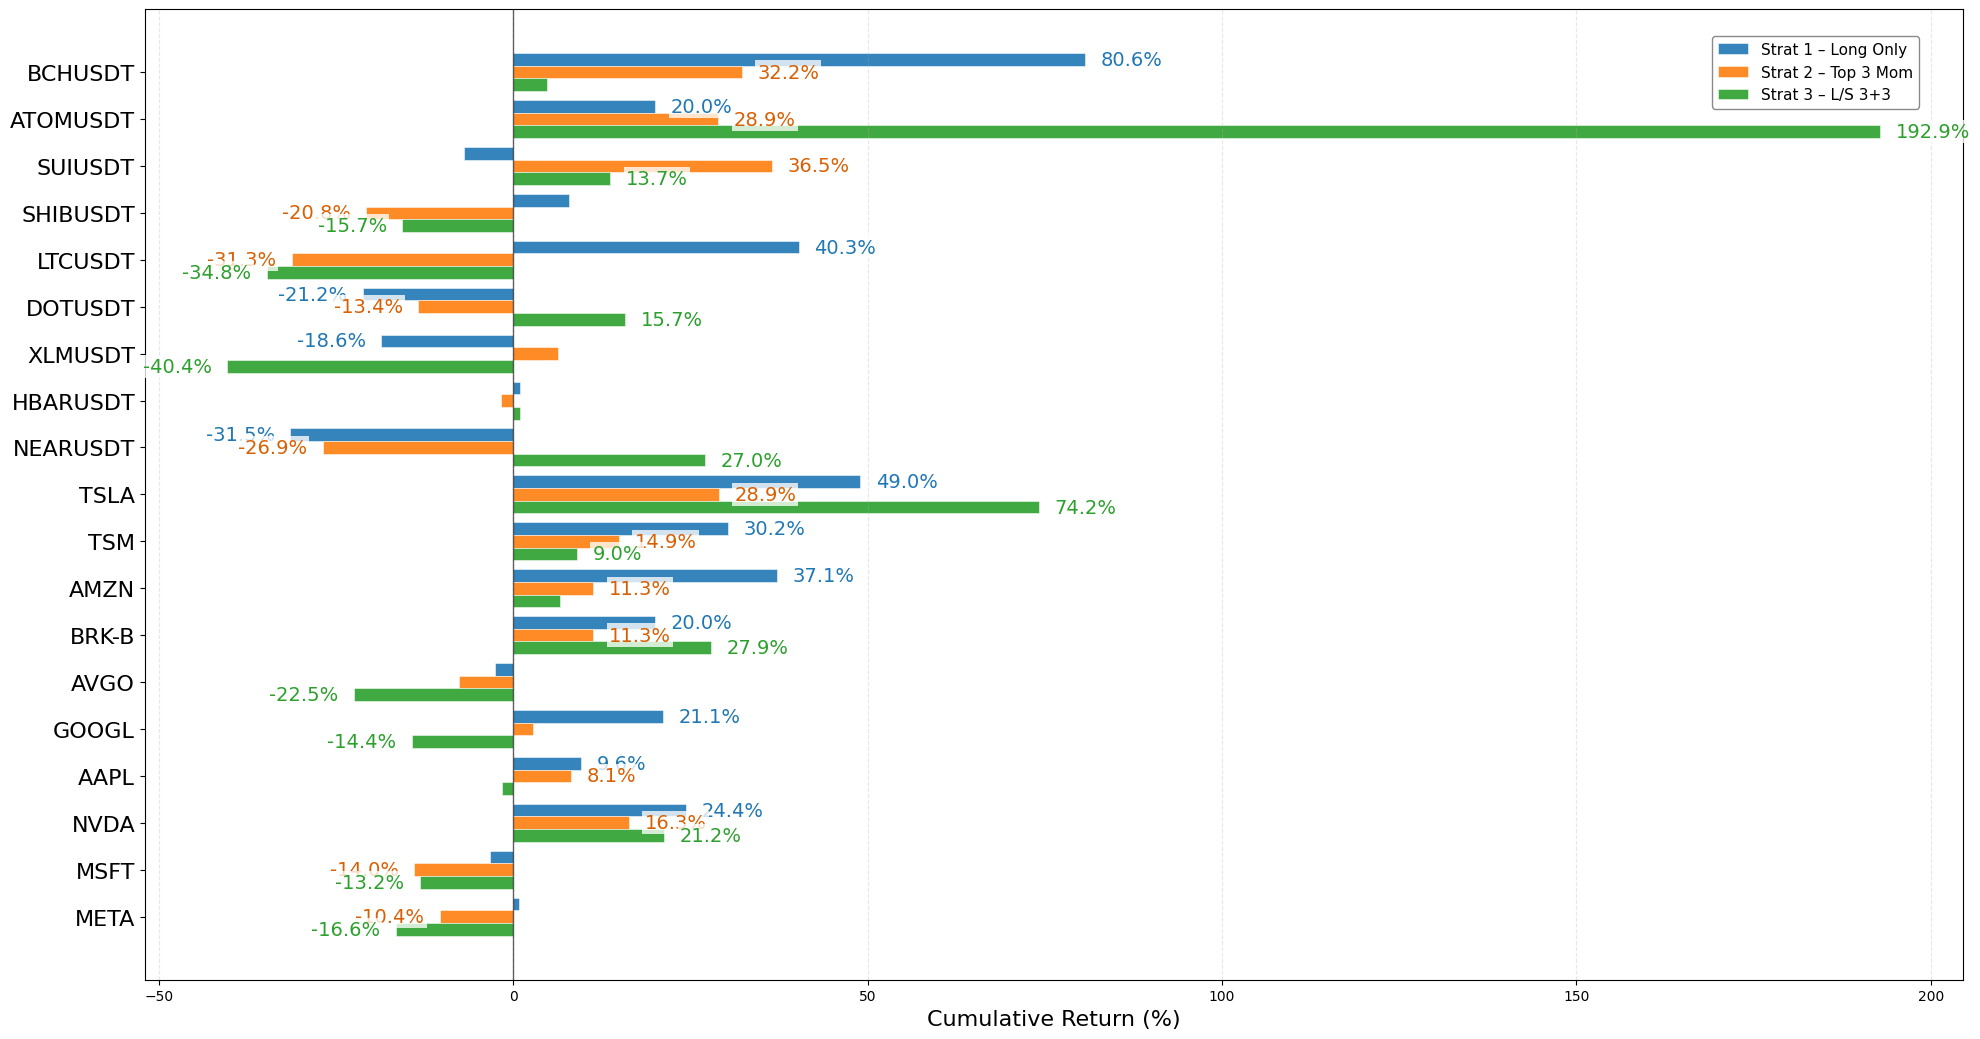

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data (same as before)
assets = [
    'BCHUSDT', 'ATOMUSDT', 'SUIUSDT', 'SHIBUSDT', 'LTCUSDT',
    'DOTUSDT', 'XLMUSDT', 'HBARUSDT', 'NEARUSDT',
    'TSLA', 'TSM', 'AMZN', 'BRK-B', 'AVGO',
    'GOOGL', 'AAPL', 'NVDA', 'MSFT', 'META'
]

strat1 = [80.64, 20.04, -7.05, 7.82, 40.26, -21.24, -18.63, 0.93, -31.48,
          48.95, 30.23, 37.12, 20.03, -2.55, 21.14, 9.56, 24.39, -3.36, 0.82]

strat2 = [32.20, 28.92, 36.52, -20.79, -31.28, -13.44, 6.28, -1.72, -26.95,
          28.94, 14.89, 11.29, 11.29, -7.67, 2.74, 8.12, 16.31, -13.99, -10.36]

strat3 = [4.78, 192.87, 13.68, -15.67, -34.77, 15.71, -40.36, 0.88, 27.00,
          74.20, 8.96, 6.50, 27.86, -22.53, -14.37, -1.62, 21.25, -13.21, -16.59]

# ────────────────────────────────────────────────
# Plot
# ────────────────────────────────────────────────

fig, ax = plt.subplots(figsize=(20, 10.5))

y = np.arange(len(assets))
width = 0.27

# Bars
ax.barh(y - width, strat1, width, label='Strat 1 – Long Only', color='#1f77b4', alpha=0.9, edgecolor='white', lw=0.4)
ax.barh(y,         strat2, width, label='Strat 2 – Top 3 Mom',  color='#ff7f0e', alpha=0.9, edgecolor='white', lw=0.4)
ax.barh(y + width, strat3, width, label='Strat 3 – L/S 3+3',    color='#2ca02c', alpha=0.9, edgecolor='white', lw=0.4)

ax.axvline(0, color='black', lw=1.0, alpha=0.6, zorder=10)

ax.set_yticks(y)
ax.set_yticklabels(assets, fontsize=16)
ax.invert_yaxis()

ax.set_xlabel('Cumulative Return (%)', fontsize=16)
# ax.set_title('Cumulative Return per Asset – All 3 Strategies', 
#              fontsize=14, fontweight='bold', pad=14)

# Legend inside the plot area
ax.legend(
    fontsize=11,
    loc='upper right',
    bbox_to_anchor=(0.98, 0.98),
    frameon=True,
    edgecolor='gray',
    facecolor='white',
    framealpha=0.92
)

ax.grid(True, axis='x', linestyle='--', alpha=0.3, zorder=0)

# ────────────────────────────────────────────────
# Value labels – smarter placement to avoid overlap
# ────────────────────────────────────────────────

def add_value_labels(bars, color='black'):
    for bar in bars:
        val = bar.get_width()
        if abs(val) < 8:  # skip very small values to reduce clutter
            continue
            
        # Position: outside for positive, inside for negative
        if val >= 0:
            x = val + 2.2
            ha = 'left'
        else:
            x = val - 2.2
            ha = 'right'
            
        ax.text(
            x, 
            bar.get_y() + bar.get_height()/2,
            f'{val:.1f}%',
            va='center',
            ha=ha,
            fontsize=14,
            color=color,
            weight='medium',
            bbox=dict(facecolor='white', alpha=0.78, edgecolor='none', pad=1.6)
        )

# Apply to each group
bars1 = ax.patches[0:len(assets)]
bars2 = ax.patches[len(assets):2*len(assets)]
bars3 = ax.patches[2*len(assets):]

add_value_labels(bars1, '#1f77b4')
add_value_labels(bars2, '#d95f02')   # darker orange for visibility
add_value_labels(bars3, '#2ca02c')

# Optional: zoom control if ATOMUSDT 193% stretches too much
# ax.set_xlim(-55, 210)

plt.tight_layout()
plt.show()

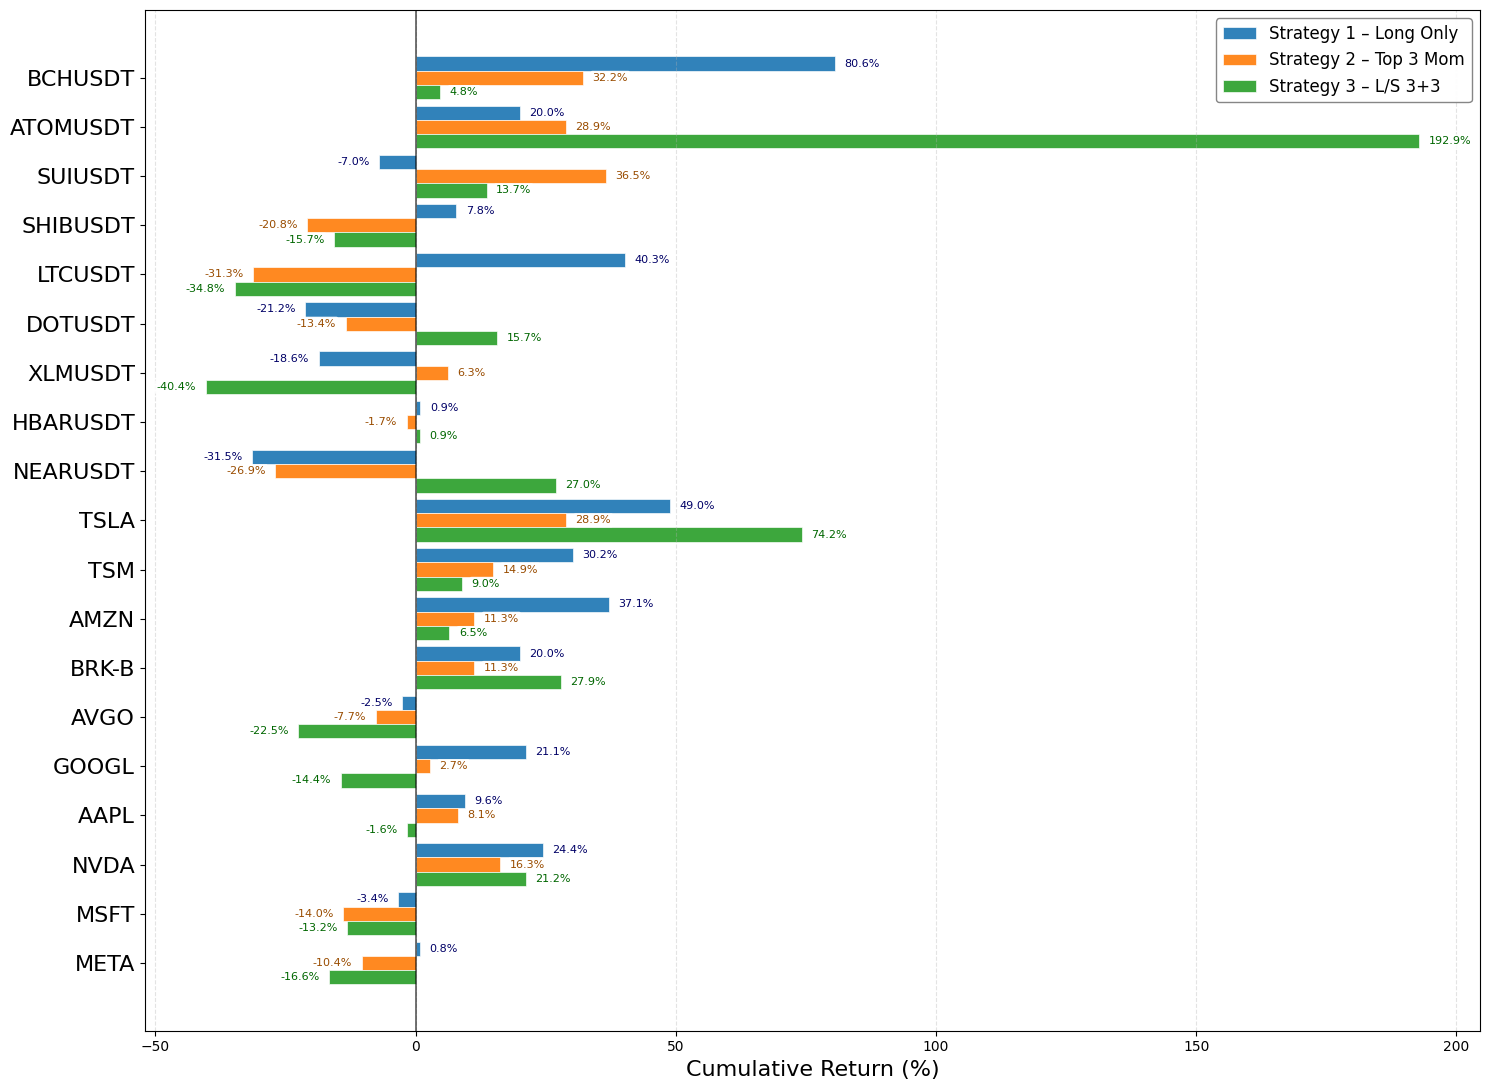

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# ── Data (unchanged) ─────────────────────────────────────────────────────────
assets = [
    'BCHUSDT', 'ATOMUSDT', 'SUIUSDT', 'SHIBUSDT', 'LTCUSDT',
    'DOTUSDT', 'XLMUSDT', 'HBARUSDT', 'NEARUSDT',
    'TSLA', 'TSM', 'AMZN', 'BRK-B', 'AVGO',
    'GOOGL', 'AAPL', 'NVDA', 'MSFT', 'META'
]

strat1 = [80.64, 20.04, -7.05, 7.82, 40.26, -21.24, -18.63, 0.93, -31.48,
          48.95, 30.23, 37.12, 20.03, -2.55, 21.14, 9.56, 24.39, -3.36, 0.82]

strat2 = [32.20, 28.92, 36.52, -20.79, -31.28, -13.44, 6.28, -1.72, -26.95,
          28.94, 14.89, 11.29, 11.29, -7.67, 2.74, 8.12, 16.31, -13.99, -10.36]

strat3 = [4.78, 192.87, 13.68, -15.67, -34.77, 15.71, -40.36, 0.88, 27.00,
          74.20, 8.96, 6.50, 27.86, -22.53, -14.37, -1.62, 21.25, -13.21, -16.59]

# ── Plot ─────────────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(15, 11))

y = np.arange(len(assets))
width = 0.29

ax.barh(y - width, strat1, width, label='Strategy 1 – Long Only', color='#1f77b4', alpha=0.92, edgecolor='white', lw=0.5)
ax.barh(y,         strat2, width, label='Strategy 2 – Top 3 Mom',  color='#ff7f0e', alpha=0.92, edgecolor='white', lw=0.5)
ax.barh(y + width, strat3, width, label='Strategy 3 – L/S 3+3',    color='#2ca02c', alpha=0.92, edgecolor='white', lw=0.5)

ax.axvline(0, color='black', lw=1.1, alpha=0.7, zorder=10)

ax.set_yticks(y)
ax.set_yticklabels(assets, fontsize=16)
ax.invert_yaxis()

ax.set_xlabel('Cumulative Return (%)', fontsize=16)
# ax.set_title('Cumulative Return per Asset – All 3 Strategies', fontsize=15, fontweight='bold', pad=15)

ax.legend(loc='upper right', fontsize=12, frameon=True, edgecolor='gray', facecolor='white', framealpha=0.95)

ax.grid(True, axis='x', linestyle='--', alpha=0.35, zorder=0)

# ── Value labels – show ALL, with compact style ──────────────────────────────
def add_labels(bars, textcolor):
    for bar in bars:
        val = bar.get_width()
        if val >= 0:
            x = val + 1.8
            ha = 'left'
        else:
            x = val - 1.8
            ha = 'right'

        ax.text(
            x, bar.get_y() + bar.get_height()/2,
            f'{val:.1f}%',
            va='center', ha=ha,
            fontsize=8.0, color=textcolor, weight='medium',
            bbox=dict(facecolor='white', alpha=0.85, edgecolor='none', pad=1.4, boxstyle='round,pad=0.18')
        )

bars1 = ax.patches[0:len(assets)]
bars2 = ax.patches[len(assets):2*len(assets)]
bars3 = ax.patches[2*len(assets):]

add_labels(bars1, '#000066')   # darker blue
add_labels(bars2, '#994c00')   # darker orange
add_labels(bars3, '#006600')   # darker green

# Optional: zoom in to make small values more visible (uncomment if needed)
# ax.set_xlim(-50, 100)   # cuts off extreme ATOMUSDT Strat3, but small bars become clearer

plt.tight_layout()
plt.show()